Aufgabe 7.0

In [29]:
import graphviz

class Graph():
    def __init__(self):
        self.gr={}

    def addNode(self,k):
        if k in self.gr:
            pass
        
        else:
            self.gr[k]=set()
            
            
    def addEdge(self,k,j):
        if (k not in self.gr) or (j not in self.gr):
            pass
        
        elif j in self.gr.get(k):
            pass
                
        else:
            (self.gr.get(k)).add(j)
    
    
    
    def E(self):
        return list(self.gr.values())
    
    def V(self):
        return list(self.gr.keys())
        v_list=[]
        for k in self.gr:
            for v in self.gr.get(k):
                v_list.append(str(k)+"->"+str(v))
        return v_list      
    
    #def allSingles(self): wie kann ein Knoten in einem Graph keinen Nachabarn haben?
        
    def mostEdges(self):
        m_list=[]                                   #liste m_list mit der Länge der sets (Werte des dicts) erstellt.
        for v in self.gr:                           #b sei der größte Wert in m_list
            a=len(self.gr.get(v))                   #falls b=der Länge eines Sets im dict entspricht, wird dessen
            m_list.append(a)                        #key zurückgegeben
        b = max(m_list)
        for e in self.gr:
            if len(self.gr.get(e))==b:
                return e
            
    def neighbours(self,v):
        n_list=[]
        n2_list=[]
        for e in self.gr.get(v):
            if e==v:
                continue
            elif e in n_list:
                continue
            else:
                n_list.append(e)
                
        for e in self.gr.get(v):                    #wenn es kein nachbarn v-1 gibt: Wähle den hinteren Nachbarn[-1]
            if v-1!=0:
                n_list.append(v-1)
            else:
                for i in self.gr:
                    n2_list.append(i)
                if max(n2_list) not in n_list:
                    n_list.append(max(n2_list))
                
        return n_list
            
       
    def goFromTo(self,k,j):
        g_list=[]
        g_list2=[]
        g_list3=[]  #Speichert Knotensprünge
        for e in self.gr.get(k):
            g_list.append(e)
        
        
        if j in g_list:
            return "Direkter Weg zu "+str(j)+" möglich."
        else:
            while j not in g_list:
                
                g_list2.clear()
                a=g_list[0]        
                if (a==k) or (a in g_list3):
                    a=g_list[1]
                if a not in g_list3:
                    g_list3.append(a)
                for x in self.gr.get(a):
                    g_list2.append(x)
                for y in g_list2:
                    if y==j:
                        g_list3.append(j)
                        g_list.append(y)
                        return g_list3
                    else:
                        g_list.clear()
                        b=g_list2[0]
                        if b in g_list3:
                            b=g_list2[1]
                        if b not in g_list3:
                            g_list3.append(b)
                        for z in self.gr.get(b):
                            
                            g_list.append(z)
            return g_list3
        
        
    
    def drawGraph(self):
        g = graphviz.Digraph()
        d_list=[]
        for k in self.gr:
            for v in self.gr.get(k):
                d_list.append((str(k),str(v)))
        g.edges(d_list)
        return g
    g.edges((1,5),1,2) 
    

In [30]:
n_g={1:{2,3,4},2:{2,3},3:{4},4:{5},5:{1}}                       
n_g=Graph()

n_g.addNode(1)
n_g.addNode(2)
n_g.addNode(3)
n_g.addNode(4)
n_g.addNode(5)
n_g.addEdge(1,2)
n_g.addEdge(1,3)
n_g.addEdge(1,4)
n_g.addEdge(2,2)
n_g.addEdge(2,3)
n_g.addEdge(3,4)
n_g.addEdge(4,5)
n_g.addEdge(5,1)

In [31]:
n_g.E()

[{2, 3, 4}, {2, 3}, {4}, {5}, {1}]

In [32]:
n_g.V()

[1, 2, 3, 4, 5]

In [33]:
n_g.mostEdges()

1

In [34]:
n_g.neighbours(1)

[2, 3, 4, 5]

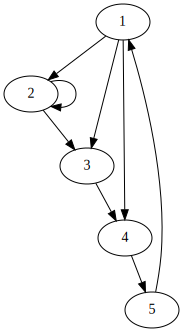

In [35]:
n_g.drawGraph()

Aufgabe 7.1

In [2]:
class Cntr():
    def __init__(self,s=[]):
        self.sequenz = s
        self.c={}
        for el in s:
            if el not in self.c:
                self.c[el] = 1 #{"H":1}
            else:
                self.c[el] += 1 #{"H": 1, "l":3, "o":2}
        self.d=[]
        for x in s:
            self.d.append(x)
        for y in self.d:
            self.c[y]=self.d.count(y)
            
    def __repr__(self):
        return str(self.c.keys())+"-->"+str(self.c.values())
    
    def most(self):
        m_list=[]
        for v in self.c:
            m_list.append(self.c.get(v)) 
        a=max(m_list)    
        for k in self.c:
            if self.c.get(k)==a:
                return k
            
    def __add__(self,v):
        newSequenz = self.sequenz + v.sequenz
        obj = Cntr(newSequenz)
        self.sequenz = obj.sequenz
        self.c = obj.c
        return self
        l1=[]
        l2=[]
        l3=[]
        l4=[]
        d1={}
        s1=set()
        for e in self.c.values():
            l1.append(e)
        for e in v.c.values():
            l2.append(e)
        for e in self.c:
            l3.append(e)
        for e in v.c:
            l4.append(e)
        s1=set(l3).intersection(set(l4))
        self.c.update(v.c)
        for e in s1:
            a=l3.index(e)
            b=l4.index(e)
            c=l1[a]+l2[b]
            d1[e]=c
        self.c.update(d1)    
        for e in self.c:
            print(e+"-->"+str(self.c.get(e)))
            
    def __mul__(self,v):
        l1=[]
        l2=[]
        l3=[]
        l4=[]
        d1={}
        s1=set()
        for e in self.c.values():
            l1.append(e)
        for e in v.c.values():
            l2.append(e)
        for e in self.c:
            l3.append(e)
        for e in v.c:
            l4.append(e)
        s1=set(l3).intersection(set(l4))
        self.c.update(v.c)
        for e in s1:
            a=l3.index(e)
            b=l4.index(e)
            c=l1[a]*l2[b]
            d1[e]=c
        self.c.update(d1)    
        for e in self.c:
            print(e+"-->"+str(self.c.get(e)))

In [3]:
d=Cntr("Hello Welt hello")
d.sequenz

'Hello Welt hello'

In [4]:
b = Cntr("Humpalumpa")
b.sequenz

'Humpalumpa'

In [5]:
d + b

dict_keys(['H', 'e', 'l', 'o', ' ', 'W', 't', 'h', 'u', 'm', 'p', 'a'])-->dict_values([2, 3, 6, 2, 2, 1, 1, 1, 2, 2, 2, 2])

In [6]:
d

dict_keys(['H', 'e', 'l', 'o', ' ', 'W', 't', 'h', 'u', 'm', 'p', 'a'])-->dict_values([2, 3, 6, 2, 2, 1, 1, 1, 2, 2, 2, 2])

In [7]:
d*Cntr("Halbleiter")

H-->2
e-->6
l-->12
o-->2
 -->2
W-->1
t-->1
h-->1
u-->2
m-->2
p-->2
a-->2
b-->1
i-->1
r-->1
